<a href="https://colab.research.google.com/github/michalakatarzyna/AIfortheindustry4.0/blob/main/AIforIndustry4.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from pathlib import Path
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

DATA PREPROCESSING PRELIMINARY ANALYSIS

In [ ]:
PATH = "/content/drive/MyDrive/Dataset"

In [ ]:
subdir_names_ls = os.listdir(PATH)

In [ ]:
def load_data_from_all_path(PATH, substance):
  substance_path_ls = []
  for subdir in subdir_names_ls:
    for path in Path(os.path.join(PATH, subdir)).rglob('*.txt'):
      if substance in path.name:
        substance_path_ls.append(pd.read_csv(path, names = [substance + '_wavelength',
                                                             substance + '_amplitude'],
                                              header=None))
  return substance_path_ls

In [ ]:
air_data = load_data_from_all_path(PATH, 'air')
water_data = load_data_from_all_path(PATH, 'water')
izopropanol_data = load_data_from_all_path(PATH, 'izopropanol')

In [ ]:
air_df = pd.concat(air_data)
water_df = pd.concat(water_data)
izopropanol_df = pd.concat(izopropanol_data)

In [ ]:
print(air_df.shape)
print(water_df.shape)
print(izopropanol_df.shape)

(30010, 2)
(30010, 2)
(30010, 2)


In [ ]:
air_df = air_df.reset_index(drop=True)
water_df = water_df.reset_index(drop=True)
izopropanol_df = izopropanol_df.reset_index(drop=True)

In [ ]:
print("air_describe \n", air_df.describe())
print()
print("water_describe \n", water_df.describe())
print()
print("izopropanol_describe \n", izopropanol_df.describe())

air_describe 
        air_wavelength  air_amplitude
count    3.001000e+04   30010.000000
mean     1.500000e-06       0.799809
std      8.663285e-08       4.903714
min      1.350000e-06      -8.798200
25%      1.425000e-06      -3.203700
50%      1.500000e-06       1.009450
75%      1.575000e-06       4.794300
max      1.650000e-06      10.003000

water_describe 
        water_wavelength  water_amplitude
count      3.001000e+04     30010.000000
mean       1.500000e-06        -1.717725
std        8.663285e-08         6.560504
min        1.350000e-06       -14.673000
25%        1.425000e-06        -6.825600
50%        1.500000e-06        -1.859100
75%        1.575000e-06         4.331600
max        1.650000e-06         9.284900

izopropanol_describe 
        izopropanol_wavelength  izopropanol_amplitude
count            3.001000e+04           30010.000000
mean             1.500000e-06              -1.765555
std              8.663285e-08               6.973005
min              1.350000e-06

In [ ]:
data_df = pd.concat([air_df, water_df, izopropanol_df], axis=1)

In [ ]:
data_df.describe()

,air_wavelength,air_amplitude,water_wavelength,water_amplitude,izopropanol_wavelength,izopropanol_amplitude
count,3.001000e+04,30010.000000,3.001000e+04,30010.000000,3.001000e+04,30010.000000
mean,1.500000e-06,0.799809,1.500000e-06,-1.717725,1.500000e-06,-1.765555
std,8.663285e-08,4.903714,8.663285e-08,6.560504,8.663285e-08,6.973005
min,1.350000e-06,-8.798200,1.350000e-06,-14.673000,1.350000e-06,-16.165000
25%,1.425000e-06,-3.203700,1.425000e-06,-6.825600,1.425000e-06,-6.877225
50%,1.500000e-06,1.009450,1.500000e-06,-1.859100,1.500000e-06,-1.625000
75%,1.575000e-06,4.794300,1.575000e-06,4.331600,1.575000e-06,4.584075
max,1.650000e-06,10.003000,1.650000e-06,9.284900,1.650000e-06,9.551500


In [ ]:
data_df = data_df[data_df.columns[data_df.columns.str.contains('air_wavelength|amplitude')]]
data_df.rename(columns={"air_wavelength":"wavelength"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
data_df['wavelength'].nunique()


3001

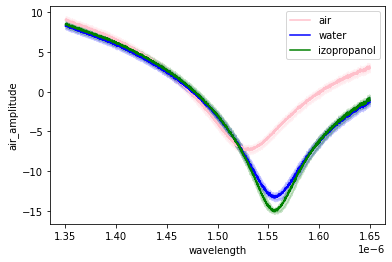

In [ ]:
sns.lineplot(x = 'wavelength',
             y = 'air_amplitude',
             color = 'pink',
             label = "air",
             data = data_df)
sns.lineplot(x = 'wavelength',
             y = 'water_amplitude',
             color = 'blue',
             label = 'water',
             data = data_df)
sns.lineplot(x = 'wavelength',
             y = 'izopropanol_amplitude',
             label = 'izopropanol',
             color = 'green',
             data = data_df)

Text(0.5, 1.0, 'Isopropanol')

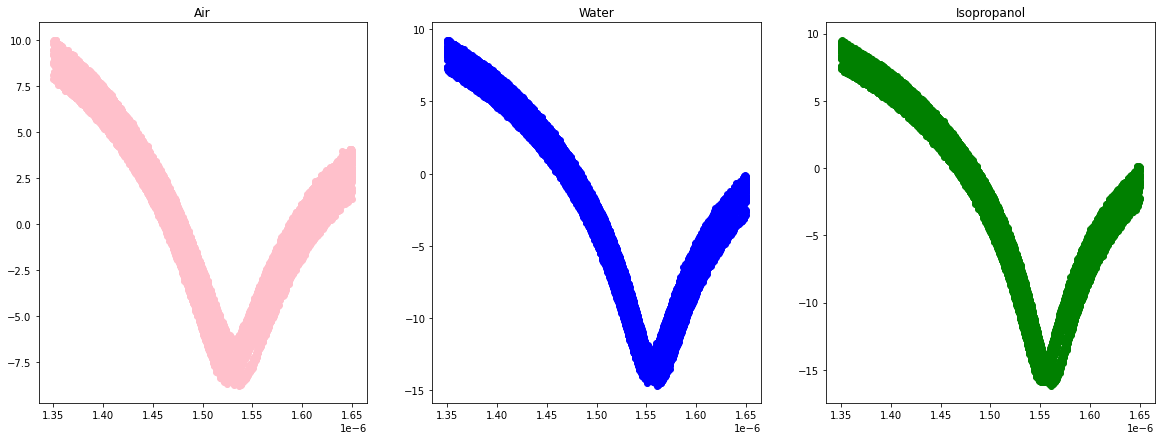

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes[0].scatter(data_df['wavelength'], data_df['air_amplitude'], color = 'pink')
axes[0].set_title('Air')
axes[1].scatter(data_df['wavelength'], data_df['water_amplitude'], color = 'blue')
axes[1].set_title('Water')
axes[2].scatter(data_df['wavelength'], data_df['izopropanol_amplitude'], color = 'green')
axes[2].set_title('Isopropanol')

In [ ]:
data_df.isna().any()

wavelength               False
air_amplitude            False
water_amplitude          False
izopropanol_amplitude    False
dtype: bool

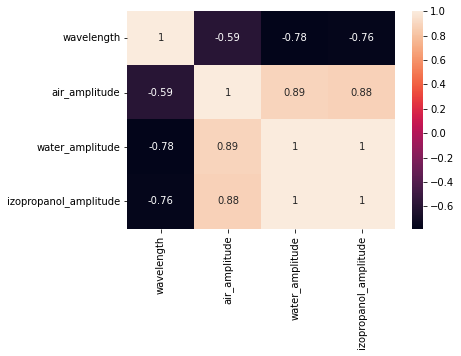

In [ ]:
sns.heatmap(data=data_df.corr(), annot=True)

#PREPARING DATA FOR THE MODELS

In [ ]:
X_water = data_df[['air_amplitude']]
y_water = data_df[['water_amplitude']]


In [ ]:
X_water_train, X_water_test, y_water_train, y_water_test = train_test_split(X_water, y_water, test_size=0.2, random_state=42)

In [ ]:
X_izopropanol = data_df[['air_amplitude']]
y_izopropanol = data_df[['izopropanol_amplitude']]


In [ ]:
X_izopropanol_train, X_izopropanol_test, y_izopropanol_train, y_izopropanol_test = train_test_split(X_izopropanol, y_izopropanol, test_size=0.2, random_state=10)

##Linear Regression

In [ ]:
model_water = LinearRegression()
model_water.fit(X_water_train, y_water_train)

LinearRegression()

In [ ]:
model_izopropanol = LinearRegression()
model_izopropanol .fit(X_izopropanol_train, y_izopropanol_train)

LinearRegression()

### MODEL EVALUATION METRICS



R^2 SCORE


In [ ]:
y_water_predict = model_water.predict(X_water_test)
r2_score(y_water_test, y_water_predict)

0.7899698557731869

In [ ]:
y_izopropanol_predict = model_izopropanol.predict(X_izopropanol_test)
r2_score(y_izopropanol_test, y_izopropanol_predict)

0.7784613532566147

MAE  

In [ ]:
y_water_pred = model_water.predict(X_water_test)
mean_absolute_error(y_water_test, y_water_pred)

2.5656546709605874

In [ ]:
y_izopropanol_pred = model_izopropanol.predict(X_izopropanol_test)
mean_absolute_error(y_izopropanol_test, y_izopropanol_pred)

2.7244942606673277

MAPE

In [ ]:
mean_absolute_percentage_error(y_water_test, y_water_pred)

1.67469348643517

In [ ]:
mean_absolute_percentage_error(y_izopropanol_test, y_izopropanol_pred)

2.084698209690647

MSE 

In [ ]:
mean_squared_error(y_water_test, y_water_pred)

9.021177051912778

In [ ]:
mean_squared_error(y_izopropanol_test, y_izopropanol_pred)

10.738979519622806

RMSE

In [ ]:
mean_squared_error(y_water_test, y_water_pred, squared=False)

3.0035274348526895

In [ ]:
mean_squared_error(y_izopropanol_test, y_izopropanol_pred, squared=False)

3.2770382237048756

##Deccision Tree

### MODEL EVALUATION METRICS

In [ ]:
model_tree_water = DecisionTreeRegressor()
model_tree_water.fit(X_water_train, y_water_train)

DecisionTreeRegressor()

In [ ]:
model_tree_izopropanol = DecisionTreeRegressor()
model_tree_izopropanol.fit(X_izopropanol_train, y_izopropanol_train)

DecisionTreeRegressor()

R^2 SCORE

In [ ]:
y_tree_water_predict = model_tree_water.predict(X_water_test)
r2_score(y_water_test, y_tree_water_predict)

0.634131126543686

In [ ]:
y_tree_izopropanol_predict = model_tree_izopropanol.predict(X_izopropanol_test)
r2_score(y_izopropanol_test, y_tree_izopropanol_predict)

0.6067210417177398

MAE

In [ ]:
y_tree_water_pred = model_tree_water.predict(X_water_test)
mean_absolute_error(y_water_test, y_tree_water_pred)

2.413633866699989

In [ ]:
y_tree_izopropanol_pred = model_tree_izopropanol.predict(X_izopropanol_test)
mean_absolute_error(y_izopropanol_test, y_tree_izopropanol_pred)

2.6487126816394535

MAPE

In [ ]:
mean_absolute_percentage_error(y_water_test, y_tree_water_pred)

2.4613114777475666

In [ ]:
mean_absolute_percentage_error(y_izopropanol_test, y_tree_izopropanol_pred)

2.581475304226259

MSE

In [ ]:
mean_squared_error(y_water_test, y_tree_water_pred)

15.714734174866697

In [ ]:
mean_squared_error(y_izopropanol_test, y_tree_izopropanol_pred)

19.064008653008926

RMSE

In [ ]:
mean_squared_error(y_water_test, y_tree_water_pred, squared=False)

3.96418140034821

In [ ]:
mean_squared_error(y_izopropanol_test, y_izopropanol_pred, squared=False)

3.2770382237048756

##Random Forest Regressor

In [ ]:
randomforest_water = RandomForestRegressor(n_estimators = 300, random_state = 42, max_depth = 100, bootstrap = True)
randomforest_water.fit(X_water_train, y_water_train) 

<ipython-input-136-3135816d93e8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_water.fit(X_water_train, y_water_train)


RandomForestRegressor(max_depth=100, n_estimators=300, random_state=42)

In [ ]:
randomforest_izopropanol = RandomForestRegressor(n_estimators = 300, random_state = 42, max_depth = 100, bootstrap = True)
randomforest_izopropanol.fit(X_izopropanol_train, y_izopropanol_train)

<ipython-input-117-8d0ced5b1f3b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_izopropanol.fit(X_izopropanol_train, y_izopropanol_train)


RandomForestRegressor(max_depth=100, n_estimators=300, random_state=42)

### MODEL EVALUATION METRICS

R^2 SCORE

In [ ]:
y_randomforest_water_predict = randomforest_water.predict(X_water_test)
r2_score(y_water_test, y_randomforest_water_predict)

0.7333513552405966

In [ ]:
y_randomforest_izopropanol_predict = randomforest_izopropanol.predict(X_izopropanol_test)
r2_score(y_izopropanol_test, y_randomforest_izopropanol_predict)

0.7062831882361995

MAE

In [ ]:
y_randomforest_water_pred = randomforest_water.predict(X_water_test)
mean_absolute_error(y_water_test, y_randomforest_water_pred)

2.254287688815163

In [ ]:
y_randomforest_izopropanol_pred = randomforest_izopropanol.predict(X_izopropanol_test)
mean_absolute_error(y_izopropanol_test, y_randomforest_izopropanol_pred)

2.49760875510357

MAPE

In [ ]:
mean_absolute_percentage_error(y_water_test, y_randomforest_water_pred)

2.3819431005118736

In [ ]:
mean_absolute_percentage_error(y_izopropanol_test, y_randomforest_izopropanol_pred)

2.5573856107801256

MSE

In [ ]:
mean_squared_error(y_water_test, y_randomforest_water_pred)

11.453044723092093

In [ ]:
mean_squared_error(y_izopropanol_test, y_randomforest_izopropanol_pred)

14.237781409552374

RMSE

In [ ]:
mean_squared_error(y_water_test, y_randomforest_water_pred, squared=False)

3.384234732268448

In [ ]:
mean_squared_error(y_izopropanol_test, y_randomforest_izopropanol_pred, squared=False)

3.773298478725527